In [2]:
import numpy as np

In [3]:
def load_data(data_path, data_length):
    with open (data_path, "r") as f:
        data = f.read()
    int_data = [int(i) for i in data.split(" ") if len(i) > 0]
    data = []
    for i in range(0, len(int_data), data_length):
        data.append(int_data[i:(i+data_length)])
    return np.array(data)

In [4]:
X_train = load_data("data/train_data.txt", 1024)
X_valid = load_data("data/valid_data.txt", 1024)
X_test = load_data("data/test_data.txt", 1024)

y_train = load_data("data/train_label.txt", 10)
y_valid = load_data("data/valid_label.txt", 10)
y_test = load_data("data/test_label.txt", 10)

In [5]:
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [74]:
model = Sequential()

model.add(Input(shape=X_train.shape[1:]))

model.add(Dense(256, activation='relu'))

model.add(Dense(512, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=10,
#                         class_weight=class_weights,
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                   callbacks=[
                                   ModelCheckpoint(
                            'check_points/{val_loss:05f}.hdf5',
                                   monitor='val_loss', save_best_only=True)])

Epoch 1/10
61/61 [==============================] - 0s 3ms/step - loss: 1.8049 - acc: 0.5796 - val_loss: 1.2688 - val_acc: 0.8360
Epoch 2/10
61/61 [==============================] - 0s 2ms/step - loss: 0.9049 - acc: 0.8707 - val_loss: 0.6370 - val_acc: 0.8960
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.4962 - acc: 0.9219 - val_loss: 0.4112 - val_acc: 0.9240
Epoch 4/10
61/61 [==============================] - 0s 2ms/step - loss: 0.3421 - acc: 0.9421 - val_loss: 0.3045 - val_acc: 0.9380
Epoch 5/10
61/61 [==============================] - 0s 2ms/step - loss: 0.2636 - acc: 0.9488 - val_loss: 0.2510 - val_acc: 0.9460
Epoch 6/10
61/61 [==============================] - 0s 2ms/step - loss: 0.2217 - acc: 0.9550 - val_loss: 0.2160 - val_acc: 0.9620
Epoch 7/10
61/61 [==============================] - 0s 2ms/step - loss: 0.1943 - acc: 0.9566 - val_loss: 0.1885 - val_acc: 0.9660
Epoch 8/10
61/61 [==============================] - 0s 2ms/step - loss: 0.1695 - acc: 0.96

In [6]:
# import matplotlib
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
# matplotlib.rcParams.update({'font.size': 22})

/home/long/miniconda3/envs/datamining/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.98      0.96      0.97        45
           2       1.00      0.88      0.94        41
           3       0.94      0.97      0.96        33
           4       0.96      0.93      0.95        59
           5       0.98      1.00      0.99        58
           6       1.00      0.98      0.99        44
           7       0.96      0.98      0.97        47
           8       0.84      0.95      0.89        40
           9       0.89      0.91      0.90        43

    accuracy                           0.96       446
   macro avg       0.96      0.95      0.95       446
weighted avg       0.96      0.96      0.96       446



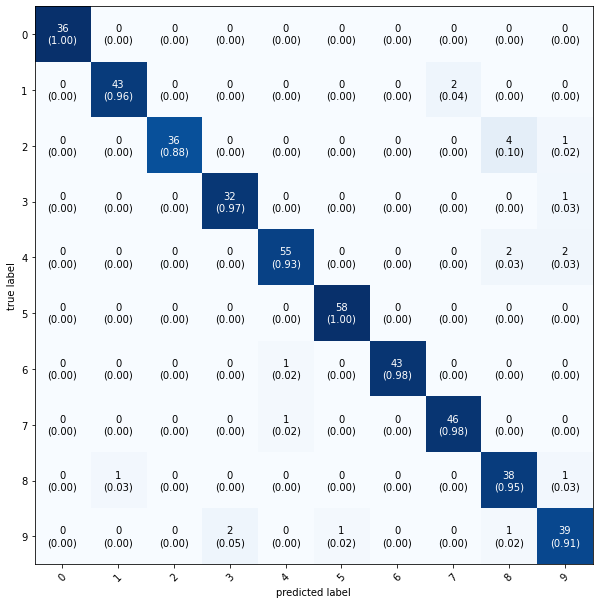

In [7]:
model = load_model("check_points/0.147560.hdf5")
y_pred = model.predict_classes(X_test)
y_true = np.argmax(y_test, axis=1)
labels = [str(i) for i in range(10)]
print(classification_report(y_true, y_pred))
plt.rcParams["figure.figsize"] = (10, 20)
fig, ax = plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                      show_normed=True,
                      show_absolute=True,
                      class_names=labels,
#                       fontsize=15
                      
                     )
plt.show()